<a href="https://colab.research.google.com/github/estoymukundjha/Cardiovascular-Risk-Pediction/blob/main/Cardiovascular_Risk_Pediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.


**Data Description**

Demographic:

• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) Behavioral

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can beconsidered continuous as one can have any number of cigarettes, even half a cigarette.) Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though infact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous) Predict variable (desired target)

• **10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)**

#1. Real world objective and constraints.




*   No low-latency requirement.
*   Model interpretability is important.
*   Error can be very costly so 'false negative' should be minimum.
*   Probability of a data-point belonging to each class is needed.


#2. Data Description

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

#3. Mapping the ML problem

##3.1 Type of Machine Learning Problem
There are two different classes of "10-year risk of coronary heart disease CHD" so here we have a **binary classification** problem.

##3.2 Performace Metric


*   Binary log-loss
*   Confusion Matrix





#4. Exploratory Data Analysis


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Data/data_cardiovascular_risk.csv")
df = pd.DataFrame(data)

In [ ]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

##4.1 Checking class imbalance.

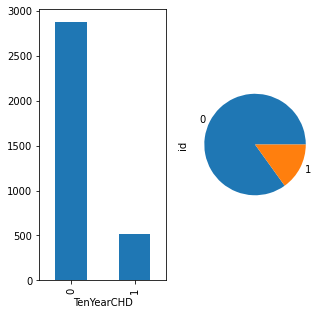

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(121)
df.groupby("TenYearCHD")['id'].count().plot.bar()

plt.subplot(122)
df.groupby("TenYearCHD")["id"].count().plot.pie(figsize=(5,5))

In [ ]:
print("-> 10-year risk of coronary heart disease CHD - True {}%".format(100-round(df['TenYearCHD'].mean()*100),2))
print("-> 10-year risk of coronary heart disease CHD - False {}%".format(round(df['TenYearCHD'].mean()*100),2))

-> 10-year risk of coronary heart disease CHD - True 85%
-> 10-year risk of coronary heart disease CHD - False 15%


**Data is heavily imbalanced**

So we need to upsample the data.

##4.2 


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Age')

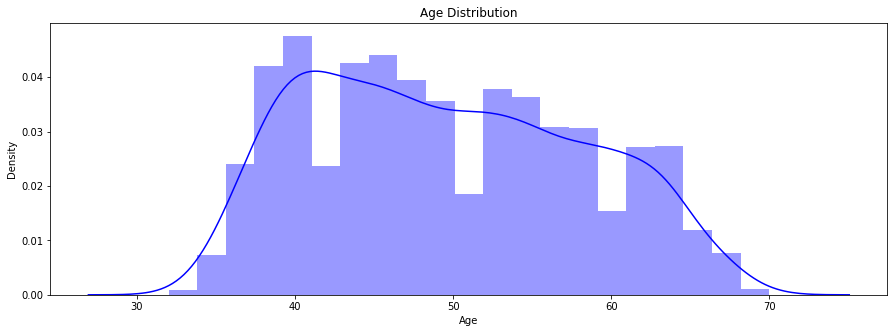

In [ ]:
plt.figure(figsize=(15,5))
sns.distplot(df["age"], color="blue")
plt.title("Age Distribution")
plt.ylabel("Density")
plt.xlabel("Age")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Cigarettes per day')

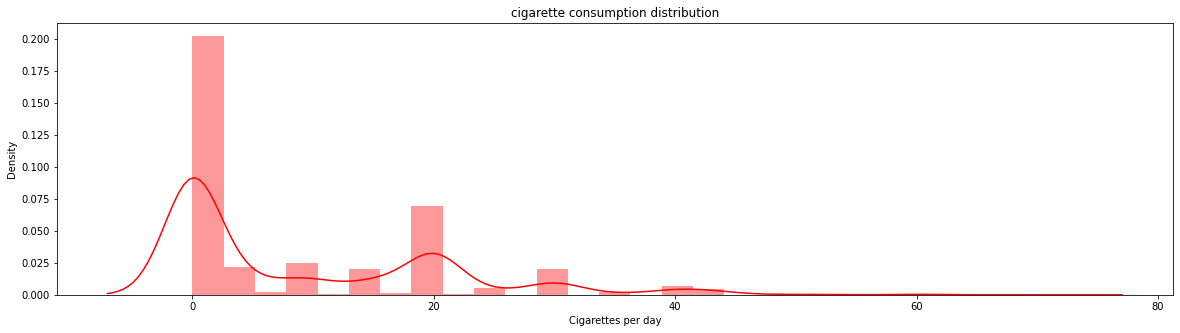

In [ ]:
plt.figure(figsize=(20,5))
sns.distplot(df["cigsPerDay"], color="red")
plt.title("cigarette consumption distribution")
plt.ylabel("Density")
plt.xlabel("Cigarettes per day")

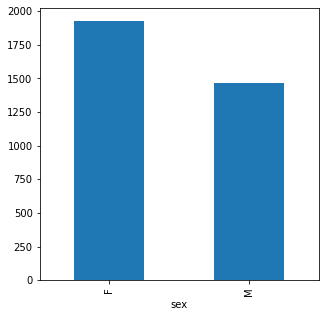

In [ ]:
plt.figure(figsize=(5,5))
df.groupby("sex")['id'].count().plot.bar()

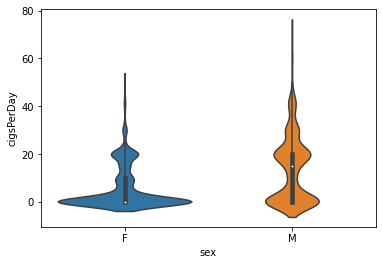

In [ ]:
sns.violinplot(data = df, x = 'sex', y = 'cigsPerDay')

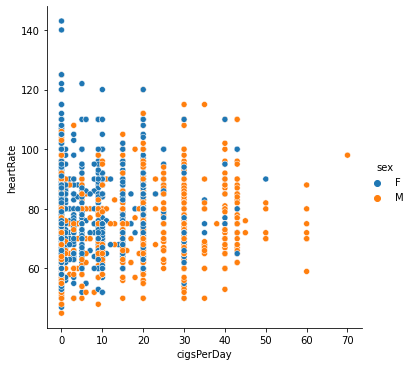

In [33]:
sns.relplot(data = df, x= 'cigsPerDay', y = 'heartRate', hue= 'sex')

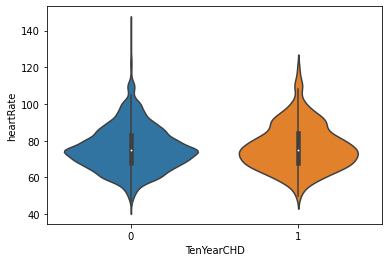

In [ ]:
sns.violinplot(data = df, x = 'TenYearCHD', y = 'heartRate')

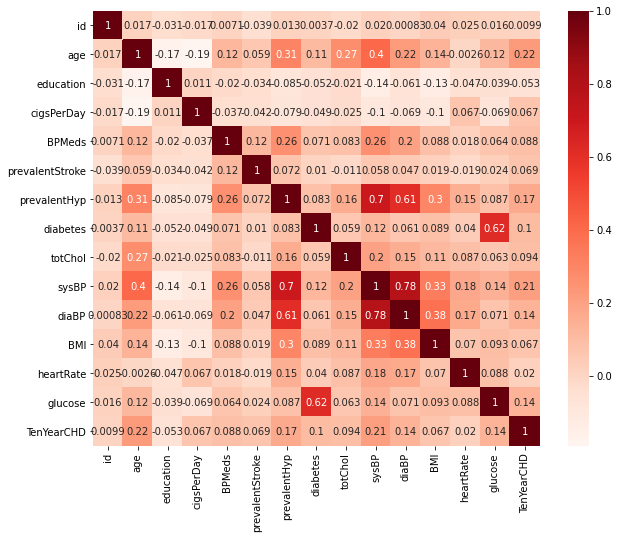

In [ ]:
plt.figure(figsize=(10,8))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()